In [1]:
import tensorflow as tf

In [15]:
#source_folder = "D:\\Study\\OneDrive - The University of Texas at Dallas\\02 Study\\22 Tensorflow\\"
source_folder = "D:\\Study\\graphs\\"

In [3]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [4]:
a = tf.add(3,5)
sess = tf.Session()
sess.run(a)

8

In [16]:
a = tf.constant(2)
b = tf.constant(3)
x = tf.add(a,b)
with tf.Session() as sess:
    writer = tf.summary.FileWriter(source_folder,sess.graph)
    print(sess.run(x))
    
writer.close()
    

5


In [18]:
a = tf.constant([2,2],name = "a")
b = tf.constant([[0,1],[2,3]],name = "b")
x = tf.add(a,b,name = "add")
y = tf.multiply(a,b,name = "mul")
with tf.Session() as sess:
    x,y = sess.run([x,y])
    print(x,y)

[[2 3]
 [4 5]] [[0 2]
 [4 6]]


In [22]:
with tf.Session() as sess:
    #print(sess.run(tf.zeros([2,3],tf.int32)))
    print(sess.run(tf.fill([2,3],9)))

[[9 9 9]
 [9 9 9]]


In [24]:
a = tf.constant([3,6])
b = tf.constant([2,2])
with tf.Session() as sess:
    print(sess.run(tf.add(a,b)))
    print(sess.run(tf.add_n([a,b,b])))
    print(sess.run(tf.multiply(a,b)))
    try:
        print(sess.run(tf.matmul(a,b)))
    except ValueError:
        print(ValueError)
    print(sess.run(tf.matmul(tf.reshape(a,[1,2]),tf.reshape(b,[2,1]))))
    print(sess.run(tf.div(a,b)))
    print(sess.run(tf.mod(a,b)))
    
          

[5 8]
[ 7 10]
[ 6 12]
<class 'ValueError'>
[[18]]
[1 3]
[1 0]


In [25]:
w = tf.Variable(tf.truncated_normal([700,10]))
with tf.Session() as sess:
    sess.run(w.initializer)
    print(w.eval())

[[-1.33463812 -0.52426511  0.07767635 ...,  0.10223423 -0.20820284
   0.01039817]
 [-1.57780874 -0.80341953 -1.09565187 ...,  0.48572725 -0.46005654
  -0.07428716]
 [-0.84351832  1.38106906 -0.34975371 ...,  1.65787876  1.05088019
   0.12286492]
 ..., 
 [ 0.10732434 -0.69001067  0.80956835 ..., -0.82521641 -1.28106773
   0.38061306]
 [-1.11393249  0.04804225  1.08416939 ...,  1.59015715  1.52950954
  -0.6028375 ]
 [ 0.24965578 -0.68924147 -1.12231529 ...,  0.66087967 -0.11761309
   0.01533936]]


In [29]:
w = tf.Variable(10)
w.assign(100)
with tf.Session() as sess:
    sess.run(w.initializer)
    print(w.eval())
    w = w.assign(100)
    print(w.eval())

10
100


In [37]:
W = tf.Variable(tf.truncated_normal([700,10]))
V = tf.Variable([2*W.initialized_value()])
sess =tf.InteractiveSession() 
sess.run(W.initializer)
sess.run(V.initializer)
V.eval()

array([[[ 1.30713427, -1.67404354,  0.05414107, ...,  0.57161474,
          2.37949657,  1.03938568],
        [-1.38797104,  1.99311233,  1.84991193, ..., -3.52762723,
         -0.59601766, -0.97263408],
        [ 1.03413582, -1.82491577, -0.02281301, ...,  3.88130808,
          1.03723037, -0.90709364],
        ..., 
        [ 0.269728  ,  0.40790072,  2.94511962, ...,  3.27089524,
          3.16447258, -3.77105069],
        [ 0.12789837, -0.93342727,  0.94280881, ...,  0.42098829,
          0.32145604, -1.35340345],
        [-1.75789714, -0.8680622 ,  0.50004727, ...,  0.71751606,
          0.22060438,  2.83627534]]], dtype=float32)

# Linear Regression Using Tensorflow

data has independent variable as incident of fire(x) and dependent variable as incident of theft(y)

In [38]:
source_folder = "D:\\Study\\OneDrive - The University of Texas at Dallas\\02 Study\\22 Tensorflow\\stanford-tensorflow-tutorials-master\\data\\"

In [39]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt

In [50]:
book = xlrd.open_workbook(source_folder+"fire_theft.xls", encoding_override= "utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows -1

In [51]:
X = tf.placeholder(tf.float32, name = "X")
Y = tf.placeholder(tf.float32, name = "Y")

In [52]:
w = tf.Variable(0.0, name = "weights")
b = tf.Variable(0.0, name = "bias")

In [53]:
Y_predicted = X*w+b
loss = tf.square(Y-Y_predicted, name = "loss")


In [54]:
opitmizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [55]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(source_folder+"/graphs/",sess.graph)
    
    for i in range(100):
        total_loss = 0
        for x, y in data:
            _, l = sess.run([opitmizer,loss],feed_dict= {X:x, Y:y})
            total_loss = total_loss + l
    writer.close()
    
    w_value,b_value = sess.run([w,b])

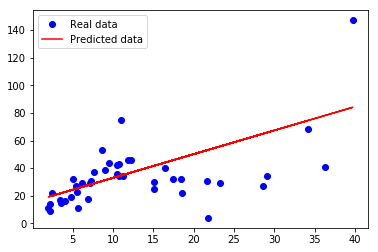

In [56]:
X,Y = data.T[0] , data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()


# Logistic Regression Using Tensorflow

MNSIT dataset to predict the digit represented by the image

In [60]:
learning_rate = 0.001
batch_size = 128
n_epochs = 30 

In [62]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/data/mnist', one_hot = True)
X = tf.placeholder(tf.float32,[batch_size,784],name = "X_placeholder")
Y = tf.placeholder(tf.float32,[batch_size,10], name = "Y_placeholder")

Extracting /data/mnist\train-images-idx3-ubyte.gz
Extracting /data/mnist\train-labels-idx1-ubyte.gz
Extracting /data/mnist\t10k-images-idx3-ubyte.gz
Extracting /data/mnist\t10k-labels-idx1-ubyte.gz


In [63]:
w = tf.Variable(tf.random_normal(shape = [784,10], stddev= 0.01), name = "weights")
b = tf.Variable(tf.random_normal(shape = [1,10]), name = "bias")

In [68]:
logits = tf.matmul(X,w)+b
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name='loss')
loss = tf.reduce_mean(entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [73]:
import time
with tf.Session() as sess:
    writer = tf.summary.FileWriter(source_folder+"/graphs/logistic_regression/",sess.graph)
    
    start_time = time.time()
    sess.run(tf.global_variables_initializer())
    n_batches = int(mnist.train.num_examples/batch_size)
    
    for i in range(n_epochs):
        total_loss = 0
        
        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            _, loss_batch = sess.run([optimizer,loss], feed_dict= {X:X_batch,Y:Y_batch})
            total_loss = total_loss + loss_batch
            
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
        
    print('Total time: {0} seconds'.format(time.time() - start_time))

    print('Optimization Finished!') # should be around 0.35 after 25 epochs
    
    preds = tf.nn.softmax(logits)
    correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) # need numpy.count_nonzero(boolarr) :(

    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0

    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        _,loss_batch,logits_batch = sess.run([optimizer,loss,logits],feed_dict= {X:X_batch, Y:Y_batch})
        preds = tf.nn.softmax(logits_batch)
        correct_preds = tf.equal(tf.argmax(preds,1),tf.argmax(Y_batch,1))
        accuracy_preds = tf.reduce_sum(tf.cast(correct_preds,tf.float32))
        total_correct_preds +=  sess.run(accuracy_preds)
        #accuracy_batch = sess.run([accuracy], feed_dict={X: X_batch, Y:Y_batch}) 
        #total_correct_preds += accuracy_batch

    print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))

    writer.close()
    
    
    

Average loss epoch 0: 2.208215488698377
Average loss epoch 1: 1.7841259282785695
Average loss epoch 2: 1.5389978088143266
Average loss epoch 3: 1.3596725930700768
Average loss epoch 4: 1.2270796507388562
Average loss epoch 5: 1.1241825085419874
Average loss epoch 6: 1.0458006432284286
Average loss epoch 7: 0.981403046137803
Average loss epoch 8: 0.9234157036512326
Average loss epoch 9: 0.8846519262918503
Average loss epoch 10: 0.8439019661405426
Average loss epoch 11: 0.8123572607696196
Average loss epoch 12: 0.7830159882287602
Average loss epoch 13: 0.7583907474448909
Average loss epoch 14: 0.7381099940457821
Average loss epoch 15: 0.7179785930749142
Average loss epoch 16: 0.7012974803264325
Average loss epoch 17: 0.6834406265012034
Average loss epoch 18: 0.6687224479544135
Average loss epoch 19: 0.6571575697763261
Average loss epoch 20: 0.6430370703443781
Average loss epoch 21: 0.6363073058756359
Average loss epoch 22: 0.6241858816924907
Average loss epoch 23: 0.6090366063695966
Aver